## Approach
The idea is that the chosen/predefined domains, subdomains and their synonyms give a good starting point in this analysis and acquisition of documents over the SignalMedia corpus.

#### Accounting for the DOMAIN appropriateness of the collected documents
By choosing a domain and subdomain combination, we can, to a large extent, guarantee that we get news from the topic that we want, and that our surface forms mean what we expect within this domain.

#### Accounting for high AMBIGUITY and VARIANCE complexity of the collected documents
This should follow from the way we choose the domains and, more specifically, from the keywords that we use in our query. 
Ambiguity of event surface forms is ensured by using ambiguous forms in multiple domains.
The variation is ensured by using synonyms within the domain, and in the queries.

#### Accounting for TIME, PARTICIPANTS, LOCATIONS confusability  of the collected documents

We use one/some of these three factors to: further specify the query, narrow down the results and establish more confidentially the coreferential hypotheses among the final set of articles.

For now, we "append" this criteria to the original query manually. We would have to look into how to optimize this.

In [1]:
import utils
import operator
import itertools
import pandas
# topics: http://www.newsreader-project.eu/files/2013/01/NWR-2014-1.pdf

In [2]:
topics = {
    'crime' : ['escape', 'shoot', 'kill', 'assassination', 'rob', 'vandalism', 'attack', 'riot', 'steal', 'bomb'],
    'life': ['die'],
    'employment': ['hire', 'fire'],
    'business': ['profit', 'takeover', 'merge', 'release', 'sales'],
    'disasters' : ['earthquake', 'fire', 'flood', 'storm', 'explosion']
}

## Workflow

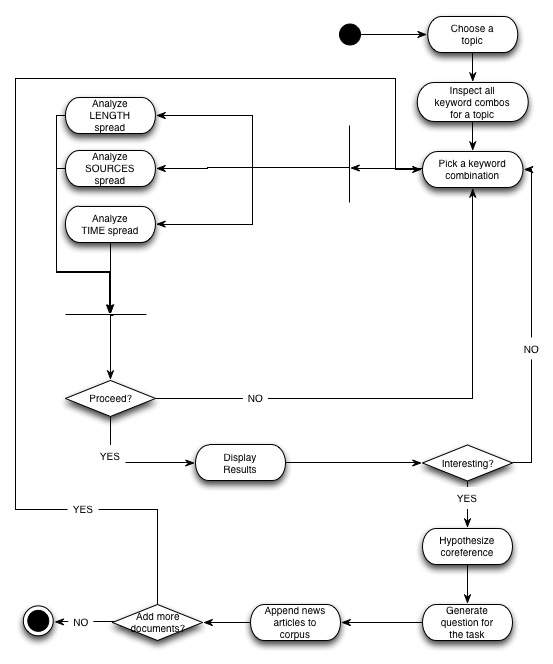

In [3]:
from IPython.display import Image
Image(filename='files/sm_workflow.png')

## Number of SignalMedia news articles per (topic + topical expressions)

In [4]:
topic='employment'
topic='business'
topic='crime'
topic='life'
topic='disasters'
lex_exps=topics[topic]
print(lex_exps)
combs = []
cnt=0
id_to_query={}
for i in range(1, len(lex_exps)+1):
    els = [list(x) for x in itertools.combinations(lex_exps, i)]
    for combo in els:
        q = topic + ' ' + ' '.join(list(combo))
        combs.append([i, q, utils.count_for_query(q)])
        id_to_query[str(cnt)]=q
        cnt+=1
        
headers = ['number_of_terms',  'terms', 'number_of_articles']
df = pandas.DataFrame(combs, columns=headers)
df

#table = utils.show_me(df, keys, headers, meta={'number_of_articles'})
#display(HTML(table))

['earthquake', 'fire', 'flood', 'storm', 'explosion']


,number_of_terms,terms,number_of_articles
0,1,disasters earthquake,301
1,1,disasters fire,362
2,1,disasters flood,195
3,1,disasters storm,243
4,1,disasters explosion,83
5,2,disasters earthquake fire,65
6,2,disasters earthquake flood,38
7,2,disasters earthquake storm,38
8,2,disasters earthquake explosion,23
9,2,disasters fire flood,44


## Analyze a specific query ID

In [5]:
#q="disasters earthquake fire"
query_id=10
q=id_to_query[str(query_id)]
url=utils.create_url_from_query(q, 1000)
#print(url)
all_results = utils.extract_hits(url)
#print(all_results)

## Inspect time

In [6]:
dates_freq = utils.count_times(all_results)
utils.print_first_x(dates_freq)

2015 42
2012 8
2013 4
2014 1


## Inspect article lengths

In [7]:
length_freq = utils.count_lenght(all_results)
utils.print_first_x(length_freq)

500 15
1000 4
1400 4
1600 3
900 3
2700 3
800 3
1500 3
600 2
1900 2
400 2


## Inspect sources

In [8]:
sources_freq = utils.count_sources(all_results)
utils.print_first_x(sources_freq)

Rolling Stone 3
reuters 2
Contra Costa Times 2
Telegraph 2
climate-weather 2
news-yahoo 2
East Brunswick Sentinel 1
Financial Content 1
Burlington County Times 1
jpost 1
Temple Daily Telegram 1


## One example

In [9]:
for value in all_results.values():
    print(value)
    break

{'_source': {'id': 'fd8b84f4d6810e6aa6d45a061ee00a1ac5cd8c87', 'media-type': 'News', 'published': '2012-10-28T22:34:00Z', 'content': 'Sandy disrupts campaigns; impact on race too early to tell\nFrom the CNN Political Unit\nOctober 29, 2012 -- Updated 1154 GMT (1954 HKT)\nSTORY HIGHLIGHTS\nRomney and Obama campaigns cancel events because of hurricane\nAccess to voting centers is a concern if storm\'s effects linger until Election Day\nVirginia governor: Measures will be taken to ensure residents are able to vote\nMcCain: Obama\'s commander in chief role could help him, but only a little\nHave you been affected by Hurricane Sandy? If so, share your images and footage with CNN iReport, but please stay safe.\nWashington (CNN) -- The massive hurricane barreling toward the East Coast has both presidential campaigns throwing out their fourth-quarter playbooks, canceling events in the storm\'s track and attempting to balance last-minute intensity with a show of compassion for people whose live

In [10]:
print(url)

http://news.fii800.lod.labs.vu.nl/news?to=2016-09-30T00:00:00Z&in=content&media=News&size=1000&match=conjunct&q=disasters fire storm&from=2010-09-01T00:00:00Z
